# New Section

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
path="/content/gdrive/MyDrive/NLP/Emotions/"
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
import os
from sklearn.model_selection import train_test_split
audio_path = []
audio_emotion = []
directory_path = os.listdir(path)
print(directory_path)

['1079_TAI_ANG_XX.wav', '1079_IEO_SAD_LO.wav', '1079_IWL_ANG_XX.wav', '1079_IEO_ANG_HI.wav', '1080_DFA_ANG_XX.wav', '1079_MTI_NEU_XX.wav', '1079_ITH_HAP_XX.wav', '1079_IWL_SAD_XX.wav', '1079_IEO_HAP_HI.wav', '1079_IWL_FEA_XX.wav', '1079_TAI_DIS_XX.wav', '1079_MTI_HAP_XX.wav', '1080_IEO_SAD_HI.wav', '1079_ITS_FEA_XX.wav', '1079_MTI_SAD_XX.wav', '1079_DFA_SAD_XX.wav', '1079_IWW_DIS_XX.wav', '1079_ITH_DIS_XX.wav', '1079_IEO_ANG_LO.wav', '1079_IEO_NEU_XX.wav', '1080_IOM_ANG_XX.wav', '1079_WSI_DIS_XX.wav', '1079_IEO_FEA_MD.wav', '1078_TSI_SAD_XX.wav', '1080_IEO_ANG_HI.wav', '1079_IEO_HAP_LO.wav', '1079_ITS_HAP_XX.wav', '1078_WSI_DIS_XX.wav', '1080_DFA_FEA_XX.wav', '1079_IWW_ANG_XX.wav', '1078_WSI_FEA_XX.wav', '1078_TSI_FEA_XX.wav', '1079_IWW_HAP_XX.wav', '1078_WSI_SAD_XX.wav', '1079_IOM_DIS_XX.wav', '1079_IWW_SAD_XX.wav', '1079_MTI_DIS_XX.wav', '1079_IWL_DIS_XX.wav', '1078_WSI_ANG_XX.wav', '1079_ITS_NEU_XX.wav', '1079_IEO_SAD_HI.wav', '1079_IEO_FEA_HI.wav', '1080_IEO_FEA_LO.wav', '1079_MTI_

In [6]:
for audio in directory_path:
    audio_path.append(path + audio)
    emotion = audio.split('_')
    if emotion[2] == 'SAD':
        audio_emotion.append("sad")
    elif emotion[2] == 'ANG':
        audio_emotion.append("angry")
    elif emotion[2] == 'DIS':
        audio_emotion.append("disgust")
    elif emotion[2] == 'NEU':
        audio_emotion.append("neutral")
    elif emotion[2] == 'HAP':
        audio_emotion.append("happy")
    elif emotion[2] == 'FEA':
        audio_emotion.append("fear")
    else:
        audio_emotion.append("unknown")
print(audio_path)
print(audio_emotion)

['/content/gdrive/MyDrive/NLP/Emotions/1079_TAI_ANG_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_IEO_SAD_LO.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_IWL_ANG_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_IEO_ANG_HI.wav', '/content/gdrive/MyDrive/NLP/Emotions/1080_DFA_ANG_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_MTI_NEU_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_ITH_HAP_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_IWL_SAD_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_IEO_HAP_HI.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_IWL_FEA_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_TAI_DIS_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_MTI_HAP_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1080_IEO_SAD_HI.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_ITS_FEA_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_MTI_SAD_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1079_DFA_SAD_XX.wav', '/content/gdrive/MyDrive/NLP/Emotions/1

In [7]:
emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
print(emotion_dataset)
print(audio_path_dataset)
dataset = pd.concat([audio_path_dataset, emotion_dataset], axis= 1)
print(dataset.head())


     Emotions
0       angry
1         sad
2       angry
3       angry
4       angry
...       ...
7437     fear
7438    happy
7439  disgust
7440  neutral
7441    happy

[7442 rows x 1 columns]
                                                   Path
0     /content/gdrive/MyDrive/NLP/Emotions/1079_TAI_...
1     /content/gdrive/MyDrive/NLP/Emotions/1079_IEO_...
2     /content/gdrive/MyDrive/NLP/Emotions/1079_IWL_...
3     /content/gdrive/MyDrive/NLP/Emotions/1079_IEO_...
4     /content/gdrive/MyDrive/NLP/Emotions/1080_DFA_...
...                                                 ...
7437  /content/gdrive/MyDrive/NLP/Emotions/1006_MTI_...
7438  /content/gdrive/MyDrive/NLP/Emotions/1006_IEO_...
7439  /content/gdrive/MyDrive/NLP/Emotions/1006_IOM_...
7440  /content/gdrive/MyDrive/NLP/Emotions/1006_IEO_...
7441  /content/gdrive/MyDrive/NLP/Emotions/1006_ITS_...

[7442 rows x 1 columns]
                                                Path Emotions
0  /content/gdrive/MyDrive/NLP/Emotions/1079_TAI

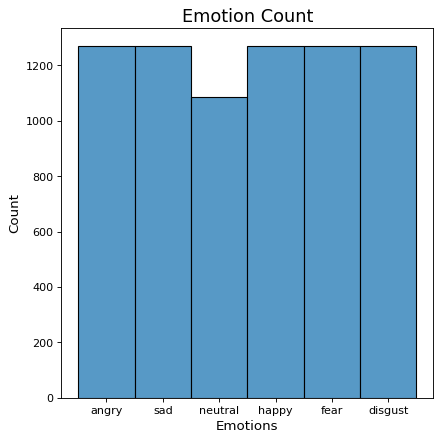

In [8]:
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(dataset.Emotions)
plt.show()

<class 'pandas.core.series.Series'>
['/content/gdrive/MyDrive/NLP/Emotions/1079_IEO_SAD_LO.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1079_IWL_SAD_XX.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1080_IEO_SAD_HI.wav' ...
 '/content/gdrive/MyDrive/NLP/Emotions/1006_IOM_SAD_XX.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1005_TIE_SAD_XX.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1006_DFA_SAD_XX.wav']
/content/gdrive/MyDrive/NLP/Emotions/1045_ITH_SAD_XX.wav


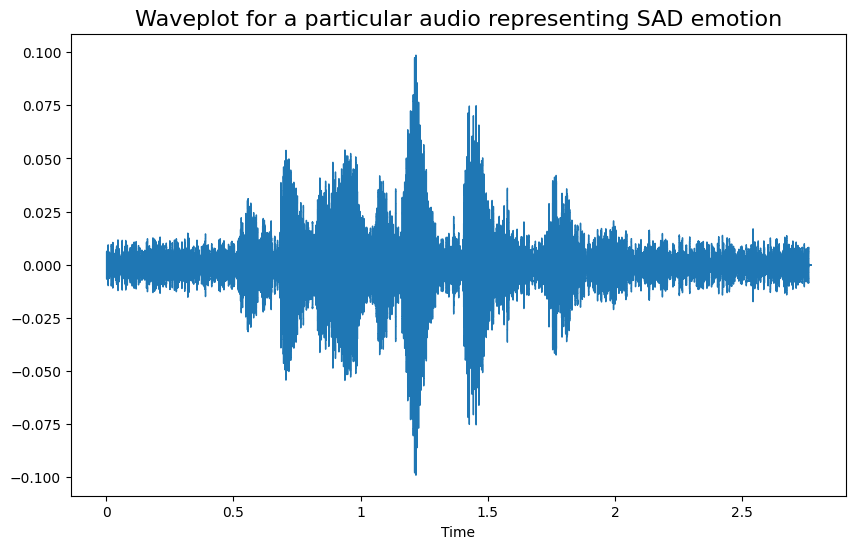

<class 'pandas.core.series.Series'>
['/content/gdrive/MyDrive/NLP/Emotions/1079_TAI_ANG_XX.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1079_IWL_ANG_XX.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1079_IEO_ANG_HI.wav' ...
 '/content/gdrive/MyDrive/NLP/Emotions/1006_IWL_ANG_XX.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1006_TAI_ANG_XX.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1006_TSI_ANG_XX.wav']
/content/gdrive/MyDrive/NLP/Emotions/1045_IOM_ANG_XX.wav


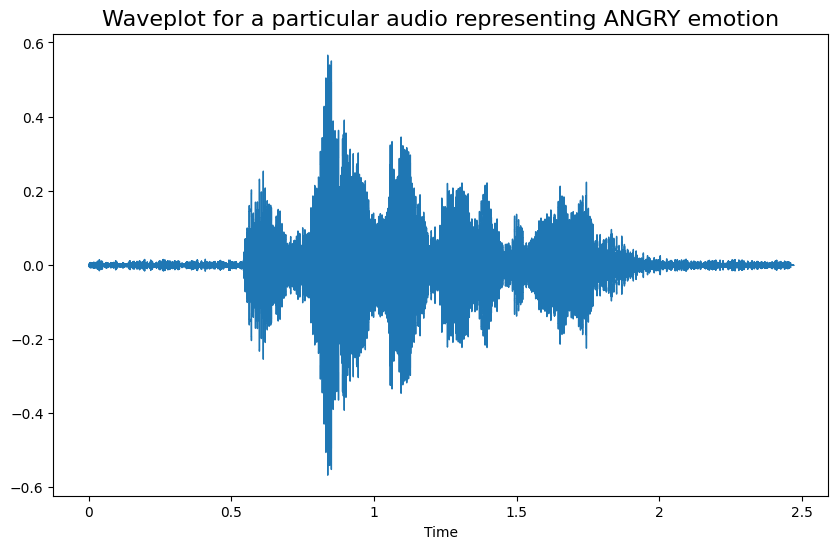

<class 'pandas.core.series.Series'>
['/content/gdrive/MyDrive/NLP/Emotions/1079_ITH_HAP_XX.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1079_IEO_HAP_HI.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1079_MTI_HAP_XX.wav' ...
 '/content/gdrive/MyDrive/NLP/Emotions/1006_IWW_HAP_XX.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1006_IEO_HAP_LO.wav'
 '/content/gdrive/MyDrive/NLP/Emotions/1006_ITS_HAP_XX.wav']
/content/gdrive/MyDrive/NLP/Emotions/1045_TIE_HAP_XX.wav


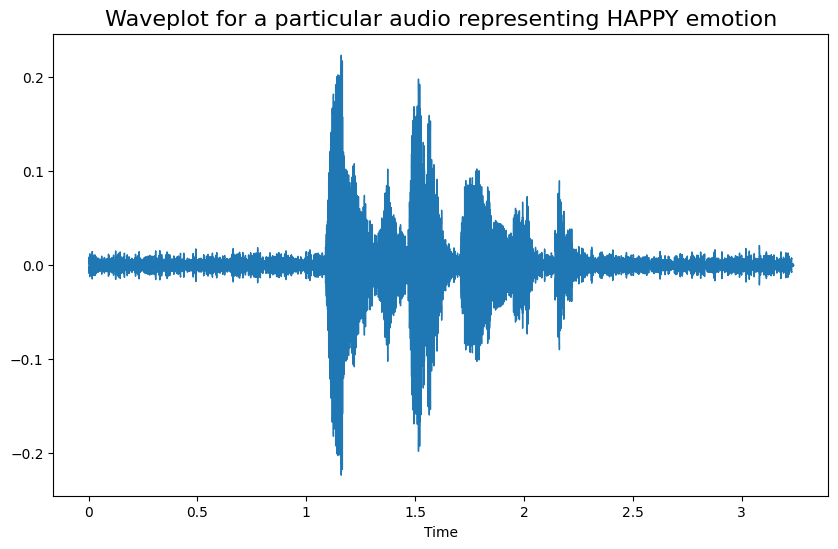

In [9]:
emotion_sad = dataset[dataset['Emotions']=='sad']['Path']
print(type(emotion_sad))
print(emotion_sad.values)
data_path = emotion_sad.values[542]
print(data_path)
data, sampling_rate = librosa.load(data_path)
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing SAD emotion", size=16)
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()
emotion_angry = dataset[dataset['Emotions']=='angry']['Path']
print(type(emotion_angry))
print(emotion_angry.values)
data_path1 = emotion_angry.values[542]
print(data_path1)
data1, sampling_rate = librosa.load(data_path1)
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing ANGRY emotion", size=16)
librosa.display.waveshow(data1, sr=sampling_rate)
plt.show()
emotion_happy = dataset[dataset['Emotions']=='happy']['Path']
print(type(emotion_happy))
print(emotion_happy.values)
data_path2 = emotion_happy.values[542]
print(data_path2)
data2, sampling_rate = librosa.load(data_path2)
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing HAPPY emotion", size=16)
librosa.display.waveshow(data2, sr=sampling_rate)
plt.show()

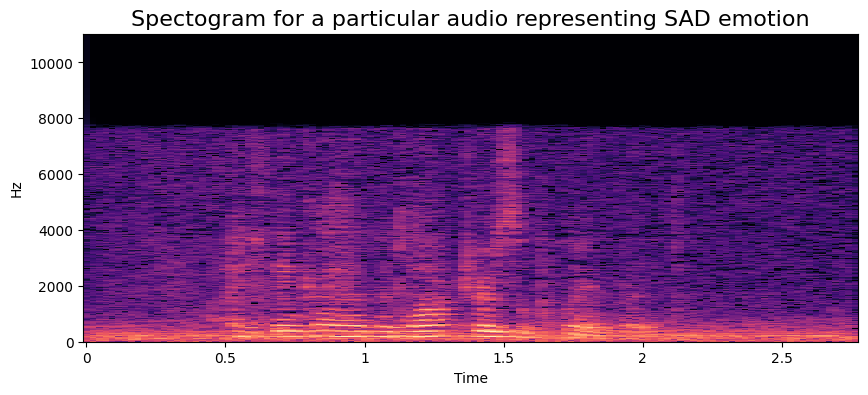

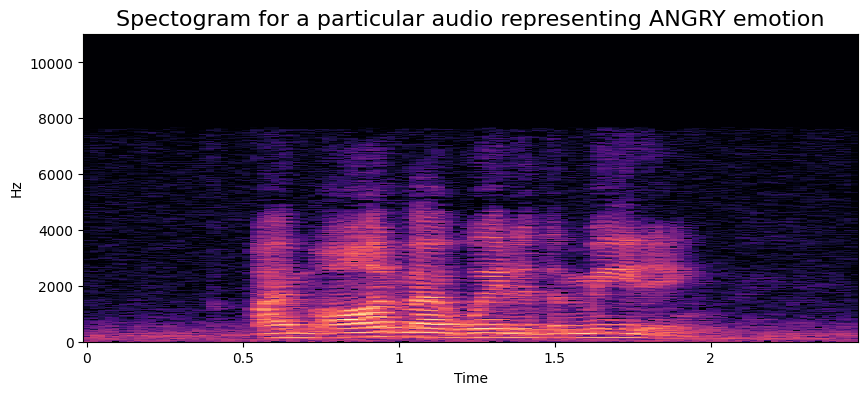

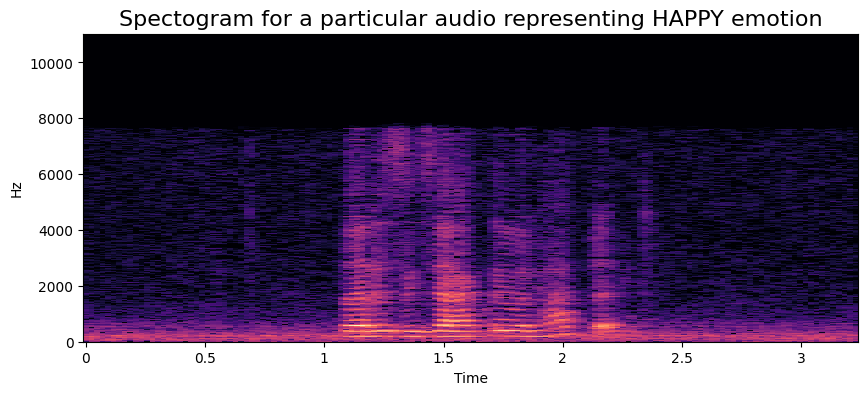

In [10]:
plt.figure(figsize=(10,4))
plt.title("Spectogram for a particular audio representing SAD emotion", size=16)
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(S_db, sr = sampling_rate, x_axis='time', y_axis='hz')
plt.show()
plt.figure(figsize=(10,4))
plt.title("Spectogram for a particular audio representing ANGRY emotion", size=16)
D = librosa.stft(data1)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(S_db, sr = sampling_rate, x_axis='time', y_axis='hz')
plt.show()
plt.figure(figsize=(10,4))
plt.title("Spectogram for a particular audio representing HAPPY emotion", size=16)
D = librosa.stft(data2)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(S_db, sr = sampling_rate, x_axis='time', y_axis='hz')
plt.show()

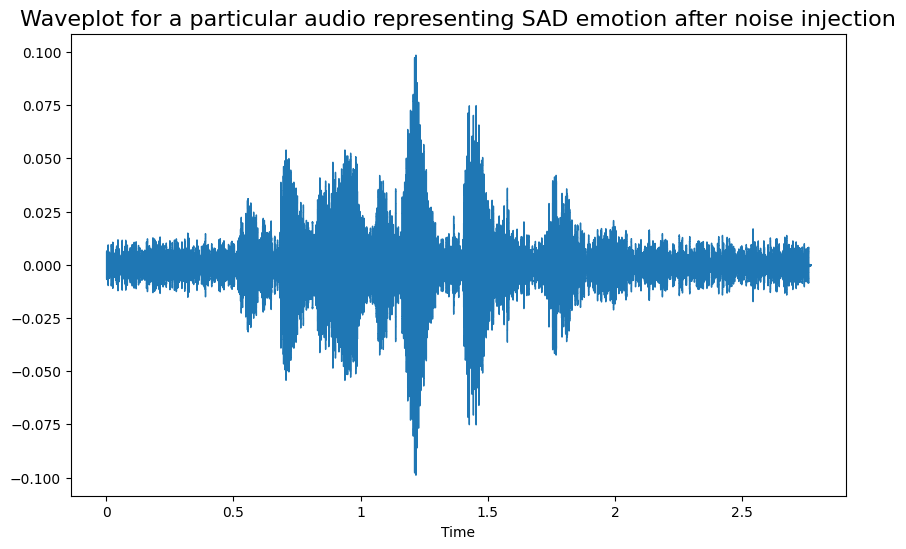

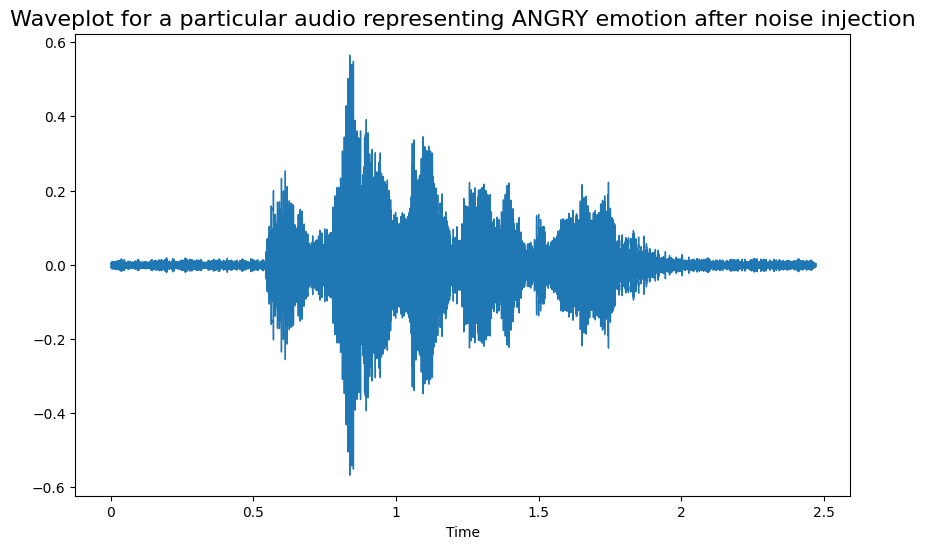

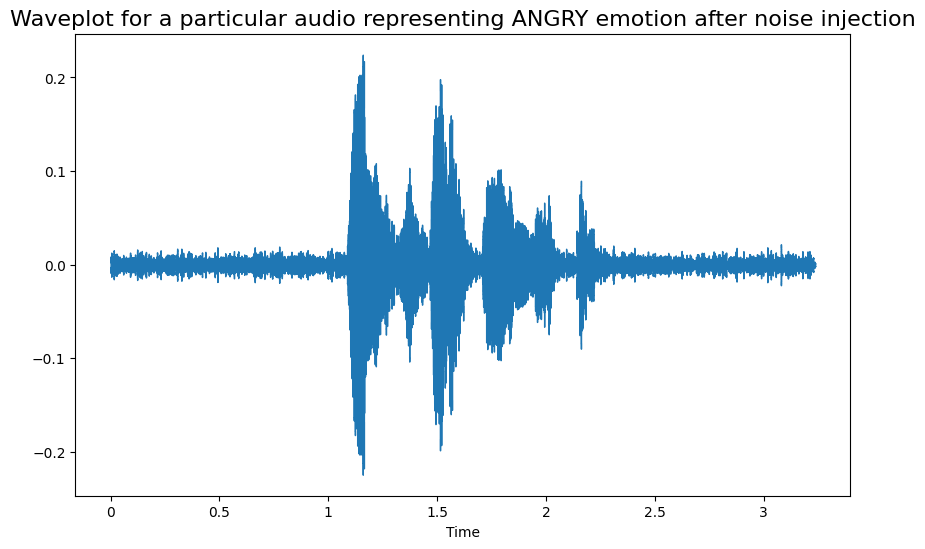

In [11]:
# Augmentation (Noise Injection)
noise_amp = 0.035*np.random.uniform()*np.amax(data)
audio_injected_data = data + noise_amp*np.random.normal(size=data.shape[0])
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing SAD emotion after noise injection", size=16)
librosa.display.waveshow(audio_injected_data, sr=sampling_rate)
plt.show()
noise_amp = 0.035*np.random.uniform()*np.amax(data1)
audio_injected_data = data1 + noise_amp*np.random.normal(size=data1.shape[0])
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing ANGRY emotion after noise injection", size=16)
librosa.display.waveshow(audio_injected_data, sr=sampling_rate)
plt.show()
noise_amp = 0.035*np.random.uniform()*np.amax(data2)
audio_injected_data = data2 + noise_amp*np.random.normal(size=data2.shape[0])
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing ANGRY emotion after noise injection", size=16)
librosa.display.waveshow(audio_injected_data, sr=sampling_rate)
plt.show()

In [12]:
X, Y = [], []
print("Feature processing")

for path, emo, index in zip(dataset.Path, dataset.Emotions, range(len(dataset))):
    value, sample = librosa.load(path)
    # noise injection
    noise_amp = 0.035 * np.random.uniform() * np.amax(value)
    value = value + noise_amp * np.random.normal(size=value.shape[0])
    # mfcc
    mfcc = librosa.feature.mfcc(y=value, sr= sample, n_mfcc=13, n_fft=200, hop_length=512)
    mfcc = np.ravel(mfcc.T)
    # mel
    mel = librosa.feature.melspectrogram(y=value, sr=sample, hop_length = 256, n_fft = 512, n_mels=64)
    mel = librosa.power_to_db(mel ** 2)
    mel = np.ravel(mel).T
    result = np.array([])
    result = np.hstack((result, mfcc, mel))
    #print(result)
    result = np.array(result)
    X.append(result)
    Y.append(emo)
print(X[0])
print(Y[0])

Feature processing


KeyboardInterrupt: 

In [ ]:
extracted_audio_df = pd.DataFrame(X)
extracted_audio_df["emotion_of_audio"] = Y
#print(extracted_audio_df)
print(extracted_audio_df.shape)
print(extracted_audio_df.tail(10))
extracted_audio_df = extracted_audio_df.fillna(0)
print(extracted_audio_df.isna().any())
print(extracted_audio_df.tail(10))

In [ ]:
X = extracted_audio_df.drop(labels='emotion_of_audio', axis= 1)
Y = extracted_audio_df['emotion_of_audio']
x_train, x_test, y_train, y_test = train_test_split(np.array(X), Y, test_size=0.2)

In [ ]:
#model 1
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
mlp_model = MLPClassifier(activation='relu',solver='sgd',hidden_layer_sizes=(100,100),alpha=0.839903176695813,batch_size=150,learning_rate='adaptive',max_iter=100000)
mlp_model.fit(x_train,y_train)
y_pred = mlp_model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("\nModel:{}    Accuracy: {:.2f}%".format(type(mlp_model).__name__ , accuracy*100))
print("Prediction")
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(df.tail(10))

In [ ]:
#model 2
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend

# Assuming x_train and y_train are your training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

param_grid = {
    'hidden_layer_sizes': [(128, 64)],
    'alpha': [0.0001],
    'batch_size': [64],
}

mlp = MLPClassifier(
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=1000
)

with parallel_backend('threading', n_jobs=-1):
    grid_search = GridSearchCV(mlp, param_grid, cv=3)
    grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

final_model = MLPClassifier(
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=1000,
    **best_params
)

final_model.fit(x_train_scaled, y_train)
y_pred = final_model.predict(x_test_scaled)  # Use final_model instead of mlp_model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("\nModel:{}    Accuracy: {:.2f}%".format(type(final_model).__name__, accuracy * 100))
print("Prediction")
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(df.tail(10))
